## Data Loading/ Overview 

 Load the dataset

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')


import seaborn as sns
import matplotlib.pyplot as plt

Trying to decode the encoding that we should use

In [2]:
data = pd.read_csv("loan.csv")
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
data.shape

(39717, 111)

In [5]:
#Check the number of null values in the columns

data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2458
emp_length                            0
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12939
purpose                               0
title                                10
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
# summing up the missing values (column-wise)
round(100*(data.isnull().sum()/len(data.index)), 2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          0.00
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

# Data Cleaning/ Preparation

Droping empty Columns

In [7]:
df = data.dropna(how='all', axis=1)
df.shape


(39717, 57)

In [8]:
# summing up the missing values (column-wise)
round(100*(df.isnull().sum()/len(df.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     0.00
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [9]:
df = df.drop('mths_since_last_delinq', axis=1) ##65 % Missing
df = df.drop('mths_since_last_record', axis=1) ##93 % Missing
df = df.drop('next_pymnt_d', axis=1) ##98 % Missing
df = df.drop('desc', axis=1) ##34% Missing
df = df.drop(['id','member_id','url','pymnt_plan'], axis=1) ## Irrelevant


df.shape

(39717, 49)

In [10]:
df['dti_bin'] = pd.cut(df['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

In [11]:
df = df.drop([ 'application_type', 'policy_code','out_prncp_inv','initial_list_status','pub_rec'], axis=1) ## Irrelevant and lack of unique values

In [12]:

df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,13382.528086,...,1.363015,95.221624,12.406112,2678.826162,0.0,0.0,0.0,0.0,0.043260,0.0
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,15885.016641,...,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.204324,0.0
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,3703.000000,...,0.000000,0.000000,0.000000,218.680000,0.0,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,8850.000000,...,0.000000,0.000000,0.000000,546.140000,0.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,17058.000000,...,0.000000,0.000000,0.000000,3293.160000,0.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,149588.000000,...,180.200000,29623.350000,7002.190000,36115.200000,0.0,0.0,0.0,0.0,2.000000,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37259 non-null object
emp_length                    39717 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
purpose                       39717 non-null object
title                         39707 non-null object
zip_co

In [14]:
df = df.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','delinq_amnt','acc_now_delinq','tax_liens'] , axis=1)## Maximum Values are 0 only
df = df.drop(['total_pymnt_inv','funded_amnt','funded_amnt_inv'],  axis=1) ## Corelated Items are already there
df = df.drop('inq_last_6mths', axis=1)      ##Irrelevant      

In [15]:
df.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,324.561922,6.896893e+04,13.315130,0.146512,9.294408,13382.528086,22.088828,51.227887,12153.596544,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,7456.670694,208.874874,6.379377e+04,6.678594,0.491812,4.400282,15885.016641,11.401709,375.172839,9042.040766,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,500.000000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,167.020000,4.040400e+04,8.170000,0.000000,6.000000,3703.000000,13.000000,0.000000,5576.930000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,10000.000000,280.220000,5.900000e+04,13.400000,0.000000,9.000000,8850.000000,20.000000,0.000000,9899.640319,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,15000.000000,430.780000,8.230000e+04,18.600000,0.000000,12.000000,17058.000000,29.000000,0.000000,16534.433040,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,44.000000,149588.000000,90.000000,6311.470000,58563.679930,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [16]:
## Checking shape
df.shape

(39717, 36)

In [17]:
##dropping Rows wherever one of the value is 0
df = df.dropna()
df.shape

(36346, 36)

In [18]:
36491/39717

0.918775335498653

we are having 92 percent of data still left after droping the null records

In [129]:
##checking again if there is any missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

loan_amnt                  0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
open_acc                   0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
total_pymnt                0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveries                 0.0
collection_recovery_fee    0.0
last_pymnt_d               0.0
last_pym

In [20]:
df.dtypes

loan_amnt                     int64
term                         object
int_rate                     object
installment                 float64
grade                        object
sub_grade                    object
emp_title                    object
emp_length                   object
home_ownership               object
annual_inc                  float64
verification_status          object
issue_d                      object
loan_status                  object
purpose                      object
title                        object
zip_code                     object
addr_state                   object
dti                         float64
delinq_2yrs                   int64
earliest_cr_line             object
open_acc                      int64
revol_bal                     int64
revol_util                   object
total_acc                     int64
out_prncp                   float64
total_pymnt                 float64
total_rec_prncp             float64
total_rec_int               

### Fixing Date Format

In [21]:


df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d, format='%b-%y')
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%y')

In [22]:
df.emp_title  = df['emp_title'].astype('category')
df.grade  = df['grade'].astype('category')
df.sub_grade  = df['sub_grade'].astype('category')
df.emp_length  = df['emp_length'].astype('category')
df.home_ownership  = df['home_ownership'].astype('category')
df.verification_status  = df['verification_status'].astype('category')
df.loan_status  = df['loan_status'].astype('category')
df.purpose  = df['purpose'].astype('category')
df.title  = df['title'].astype('category')
df.addr_state  = df['addr_state'].astype('category')
df.zip_code  = df['zip_code'].astype('category')
df.int_rate  = df['int_rate'].astype('str')


### New Feature Generation

In [23]:
df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year

In [24]:
df.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year
count,36346.000000,36346.000000,3.634600e+04,36346.000000,36346.000000,36346.000000,36346.000000,36346.000000,36346.000000,36346.000000,36346.000000,36346.000000,36346.000000,36346.000000,36346.000000,36346.000000,36346.000000,36346.000000,36346.000000
mean,11315.877263,326.413639,6.928064e+04,13.496009,0.145766,9.367853,13506.455291,22.271337,52.533634,12319.852335,9918.825775,2306.741838,1.296111,92.988692,11.690986,2745.515668,0.041545,6.897403,1996.910802
std,7437.421264,207.528601,6.313508e+04,6.603439,0.491438,4.369298,15703.714790,11.375994,380.306037,9053.820874,7057.386003,2631.457313,7.054285,682.815149,141.041147,4475.789456,0.200513,3.542360,6.951695
min,500.000000,16.080000,4.000000e+03,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,33.730000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.000000,1.000000,1969.000000
25%,5600.000000,168.922500,4.200000e+04,8.420000,0.000000,6.000000,3878.000000,14.000000,0.000000,5675.041533,4800.000000,678.670000,0.000000,0.000000,0.000000,226.755000,0.000000,4.000000,1994.000000
50%,10000.000000,283.370000,6.000000e+04,13.570000,0.000000,9.000000,9060.000000,21.000000,0.000000,10105.850205,8149.160000,1380.645000,0.000000,0.000000,0.000000,572.340000,0.000000,7.000000,1998.000000
75%,15000.000000,432.490000,8.300000e+04,18.710000,0.000000,12.000000,17264.750000,29.000000,0.000000,16718.423537,14000.000000,2895.215000,0.000000,0.000000,0.000000,3463.972500,0.000000,10.000000,2001.000000
max,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,44.000000,149588.000000,90.000000,6311.470000,58563.679930,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000,12.000000,2068.000000


######  We need to fix year here it can be more than current year

In [25]:
df[(df.earliest_cr_line_year > 2008)]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,dti_bin,earliest_cr_line_month,earliest_cr_line_year
1764,5500,36 months,7.51%,171.11,A,A3,AstroMotive Auto Service,4 years,RENT,63000.0,...,0.00000,0.000000,0.0000,2012-02-01,539.21,2015-09-01,0.0,5-10,9,2068
3274,5000,36 months,12.69%,167.73,B,B5,Pittsburgh Public Schools,10+ years,MORTGAGE,72000.0,...,0.00000,0.000000,0.0000,2014-12-01,187.76,2015-05-01,0.0,5-10,9,2067
3349,21000,36 months,12.69%,704.45,B,B5,MAJR Financial,10+ years,MORTGAGE,267000.0,...,0.00000,0.000000,0.0000,2014-12-01,725.56,2014-11-01,0.0,5-10,2,2065
3403,15000,60 months,16.77%,370.94,D,D2,Harvard Vanguard Medical Associates,< 1 year,MORTGAGE,58000.0,...,0.00000,5800.590000,472.3020,2012-12-01,29.88,2013-04-01,0.0,20-25,6,2067
4478,6000,36 months,6.03%,182.62,A,A1,BASF Corporation,10+ years,MORTGAGE,96000.0,...,0.00000,0.000000,0.0000,2013-10-01,2476.98,2016-05-01,0.0,20-25,3,2063
5092,27400,60 months,17.27%,684.95,D,D3,Los Angeles Junior College District,10+ years,MORTGAGE,143500.0,...,0.00000,7646.370000,1005.7482,2012-08-01,684.95,2013-02-01,0.0,15-20,8,2068
5673,16200,60 months,18.25%,413.58,D,D5,Claiborne Farm,5 years,OWN,47052.0,...,0.00000,0.000000,0.0000,2013-07-01,12524.15,2013-07-01,0.0,15-20,5,2065
6416,16400,60 months,22.35%,456.22,F,F5,The Paradies Shops,2 years,RENT,80000.0,...,0.00000,0.000000,0.0000,2014-12-01,8640.79,2016-05-01,1.0,20-25,6,2068
7424,35000,60 months,13.49%,805.17,C,C1,OfficeMax,10+ years,RENT,62000.0,...,0.00000,0.000000,0.0000,2015-09-01,10594.41,2016-03-01,0.0,15-20,10,2065
7460,30000,36 months,18.64%,1094.23,E,E1,"Technical Fibre Products, Inc",10+ years,MORTGAGE,166000.0,...,0.00000,0.000000,0.0000,2014-10-01,1113.30,2016-04-01,0.0,15-20,4,2066


In [26]:
df.loc[df['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = df['earliest_cr_line_year'] - 100

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36346 entries, 1 to 39680
Data columns (total 38 columns):
loan_amnt                  36346 non-null int64
term                       36346 non-null object
int_rate                   36346 non-null object
installment                36346 non-null float64
grade                      36346 non-null category
sub_grade                  36346 non-null category
emp_title                  36346 non-null category
emp_length                 36346 non-null category
home_ownership             36346 non-null category
annual_inc                 36346 non-null float64
verification_status        36346 non-null category
issue_d                    36346 non-null datetime64[ns]
loan_status                36346 non-null category
purpose                    36346 non-null category
title                      36346 non-null category
zip_code                   36346 non-null category
addr_state                 36346 non-null category
dti                        

### Fixing Rate of interest

In [28]:
# The column int_rate is character type, let's convert it to float
df['int_rate'] = df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))


In [29]:
# The column int_rate is character type, let's convert it to float
#loan_default_frame['int_rate'] = loan_default_frame['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

### Fixinig Emp_Title

In [30]:
g  = len(df['emp_title'].unique())
Percentage = g / len(df['emp_title'])
Percentage

0.7746932262147141

###### There looks like 77.4 % unique Emp Title, we need to get in depth if any text manipulation required

In [31]:
df['emp_title'].value_counts()


US Army                                  130
Bank of America                          108
IBM                                       66
AT&T                                      59
Kaiser Permanente                         55
USAF                                      54
Wells Fargo                               54
UPS                                       52
US Air Force                              51
Lockheed Martin                           44
Walmart                                   43
U.S. Army                                 41
State of California                       40
Verizon Wireless                          40
United States Air Force                   40
USPS                                      39
Walgreens                                 38
US ARMY                                   37
JP Morgan Chase                           37
JPMorgan Chase                            36
Department of Defense                     35
Target                                    35
Booz Allen

###### Observation - we can see that although we found 77 % unique values but here text cleaning is required. We can see number of duplicate titles

In [32]:
##converting string into lower
df['emp_title'] = df['emp_title'].str.lower()

In [33]:
### Text Cleaning
df['emp_title'] = df['emp_title'].str.replace('u.s. army','us army')
df['emp_title'] = df['emp_title'].str.replace('jpmorgan chase','jp morgan chase')
df['emp_title'] = df['emp_title'].str.replace('self','self employed')
df['emp_title'] = df['emp_title'].str.replace('united states air force','us air force')
df['emp_title'] = df['emp_title'].str.replace('usaf','us air force')
df['emp_title'] = df['emp_title'].str.replace('ups','united parcel service')
df['emp_title'] = df['emp_title'].str.replace('usps','united states postal service')
df['emp_title'] = df['emp_title'].str.replace('wells fargo','wells fargo bank')
#df['emp_title'] = df['emp_title'].str.replace('verizon wireless wireless','verizon wireless')
df['emp_title'] = df['emp_title'].str.replace('united states army','us army')
df['emp_title'] = df['emp_title'].str.replace('wells fargo bank bank','wells fargo bank')
df['emp_title'] = df['emp_title'].str.replace('self employed employed','self employed')
df['emp_title'] = df['emp_title'].str.replace('verizon wireless','verizon')
                    
                                              

### Fixing Target Variable that is Loan Status

In [34]:
## for easy reference converting loan status on 0 and 1 so that numerical operation could be done easily
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x=='Charged Off'  else 0)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))





# Univariate Analysis

In [35]:
# summarising the values
df['loan_status'].value_counts()

0    31414
1     4932
Name: loan_status, dtype: int64

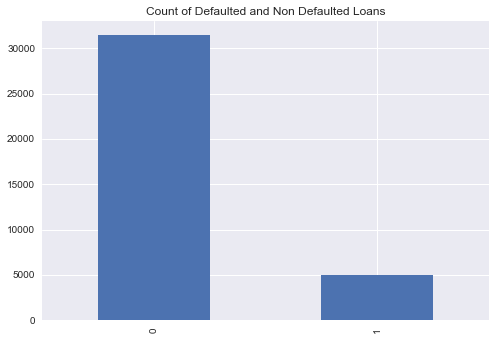

In [128]:
df['loan_status'].value_counts().plot.bar()
plt.title("Count of Defaulted and Non Defaulted Loans")
plt.show()

###### Observation : There are 31414 loans that are not defaulted yet while there are 4943 loans that are defaulted

In [37]:
##Creating loan default frame specific to defaulted loans
loan_default_frame = df[df['loan_status'] == 1]
loan_default_frame

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,dti_bin,earliest_cr_line_month,earliest_cr_line_year
1,2500,60 months,15.27,59.83,C,C4,ryder,< 1 year,RENT,30000.0,...,0.000000,117.08,1.1100,2013-04-01,119.66,2013-09-01,0.0,0-5,4,1999
9,5375,60 months,12.69,121.45,B,B5,starbucks,< 1 year,RENT,15000.0,...,0.000000,269.29,2.5200,2012-11-01,121.45,2013-03-01,0.0,15-20,9,2004
12,9000,36 months,13.49,305.38,C,C1,va. dept of conservation/recreation,< 1 year,RENT,30000.0,...,0.000000,444.30,4.1600,2012-07-01,305.38,2012-11-01,0.0,10-15,4,2004
14,10000,36 months,10.65,325.74,B,B2,sfmta,3 years,RENT,100000.0,...,0.000000,645.10,6.3145,2013-10-01,325.74,2014-03-01,0.0,5-10,5,1991
21,21000,36 months,12.42,701.73,B,B4,osram sylvania,10+ years,RENT,105000.0,...,0.000000,0.00,0.0000,2013-09-01,701.73,2016-05-01,0.0,10-15,2,1983
24,6000,36 months,11.71,198.46,B,B3,bmg-educational,1 year,RENT,76000.0,...,0.000000,269.31,2.5700,2012-10-01,198.46,2013-03-01,0.0,0-5,6,2001
27,5000,60 months,16.77,123.65,D,D2,frito lay,2 years,RENT,50004.0,...,0.000000,260.96,2.3000,2012-12-01,123.65,2013-05-01,0.0,10-15,10,2003
46,5000,36 months,8.90,158.77,A,A5,steris corporation,10+ years,MORTGAGE,100000.0,...,0.000000,107.00,1.0700,2014-08-01,158.77,2014-12-01,0.0,15-20,6,1995
50,15000,36 months,9.91,483.38,B,B1,caterpillar inc.,8 years,MORTGAGE,80000.0,...,24.170000,222.81,36.3708,2014-10-01,483.38,2015-03-01,0.0,5-10,4,1992
53,12000,36 months,15.96,421.65,C,C5,chemat technology inc,4 years,RENT,50000.0,...,0.000000,578.94,5.4900,2012-08-01,421.65,2012-12-01,0.0,20-25,10,2006


In [38]:
loan_default_frame['loan_status'].value_counts()


1    4932
Name: loan_status, dtype: int64

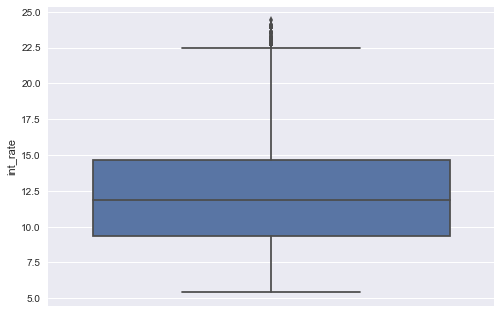

In [39]:
sns.boxplot(y=df['int_rate'])
#plt.yscale('log')
plt.show()


###### Observation - we can see few outlier above 22.5 interest rate , maximum loans are spread in between 10 to 15 % interest Rate

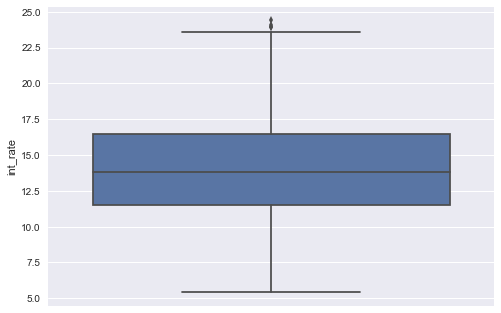

In [40]:
sns.boxplot(y=loan_default_frame['int_rate'])
#plt.yscale('log')
plt.show()

###### Observation - For all  defaulter, Interest rate is more ,maximum loans are spread between around 11.5 to 16 % interest Rate

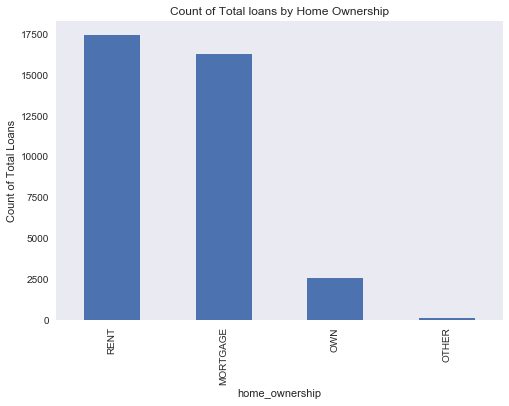

In [41]:
g1 =df.groupby('home_ownership')['loan_status'].count().sort_values(ascending=False).plot.bar()
g1.grid(False)
plt.xlabel("home_ownership")
plt.ylabel("Count of Total Loans")
plt.title("Count of Total loans by Home Ownership")
plt.show()

###### Observation - Maximum Loan Applicants are having rented homes

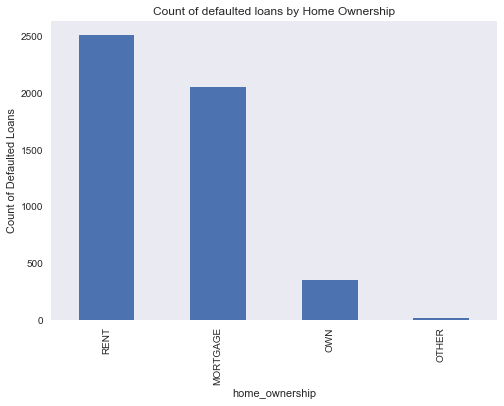

In [42]:
g2 =loan_default_frame.groupby('home_ownership')['loan_status'].count().sort_values(ascending=False).plot.bar()
g2.grid(False)
plt.xlabel("home_ownership")
plt.ylabel("Count of Defaulted Loans")
plt.title("Count of defaulted loans by Home Ownership")
plt.show()

###### Observation - Maximum Defaulted Loan applicant are having home as Rented 

In [43]:
g1 =df.groupby('home_ownership')['loan_status'].count().sort_values(ascending=False)
g1

home_ownership
RENT        17434
MORTGAGE    16250
OWN          2568
OTHER          94
Name: loan_status, dtype: int64

In [44]:
g4 =loan_default_frame.groupby('home_ownership')['loan_status'].count().sort_values(ascending=False)
g4

home_ownership
RENT        2511
MORTGAGE    2055
OWN          348
OTHER         18
Name: loan_status, dtype: int64

In [45]:
d = (g4/g1)*100
d

home_ownership
RENT        14.402891
MORTGAGE    12.646154
OWN         13.551402
OTHER       19.148936
Name: loan_status, dtype: float64

###### Observation - Default Ratio of home ownership as other is maximum that is 19.14 % and then comes home as rented that is 14.40 %

In [46]:
df['emp_title'].value_counts().nlargest(20)


us army                         281
us air force                    155
bank of america                 136
self employed                   105
wells fargo bank                103
verizon                         103
united parcel service            97
united states postal service     95
jp morgan chase                  86
at&t                             79
walmart                          77
kaiser permanente                68
ibm                              68
walgreens                        53
lockheed martin                  49
state of california              46
us navy                          45
us postal service                44
home depot                       44
department of defense            43
Name: emp_title, dtype: int64

In [47]:
loan_default_frame['emp_title'].value_counts().nlargest(20)

us army                         40
bank of america                 24
united parcel service           20
united states postal service    19
walmart                         18
verizon                         17
at&t                            16
self employed                   16
us air force                    13
wells fargo bank                12
us postal service               10
ibm                              9
jp morgan chase                  9
kaiser permanente                8
walgreens                        8
home depot                       7
target                           7
department of defense            7
retired                          7
wal-mart                         6
Name: emp_title, dtype: int64

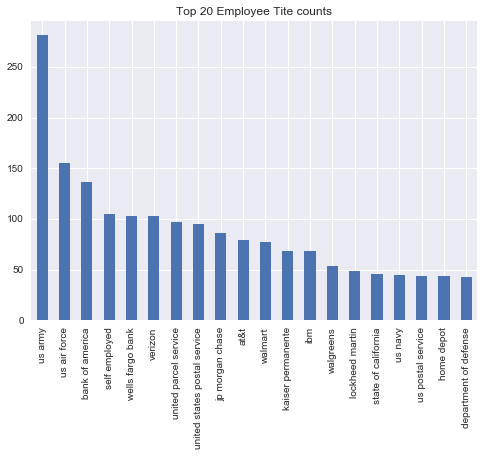

In [127]:
df['emp_title'].value_counts().nlargest(20).plot.bar()
plt.title("Top 20 Employee Tite counts")
plt.show()


###### Observation - Employee title - US Army Accounts for maximum Number of loan 

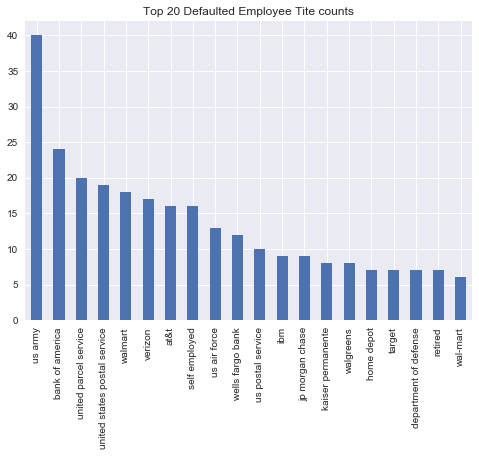

In [126]:
loan_default_frame['emp_title'].value_counts().nlargest(20).plot.bar()
plt.title("Top 20 Defaulted Employee Tite counts")
plt.show()

###### Observation - As expected count of defaulter is maximum for US army title that is quite obvious too since count of applicants from this category were max. It is interested to See new titles coming up in order in term of number of defaulters. So,we can see Ratio of deaulters are maximum in bank of America (18%) , United parcel serice(20%)  , walmart(24% max) and unitied states postal service(20%) are more 

In [50]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,open_acc,revol_bal,total_acc,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year
count,36346.000000,36346.000000,36346.000000,3.634600e+04,36346.000000,36346.000000,36346.000000,36346.000000,36346.000000,36346.000000,...,36346.000000,36346.000000,36346.000000,36346.000000,36346.000000,36346.000000,36346.000000,36346.000000,36346.000000,36346.000000
mean,11315.877263,12.075684,326.413639,6.928064e+04,0.135696,13.496009,0.145766,9.367853,13506.455291,22.271337,...,12319.852335,9918.825775,2306.741838,1.296111,92.988692,11.690986,2745.515668,0.041545,6.897403,1996.773235
std,7437.421264,3.735899,207.528601,6.313508e+04,0.342470,6.603439,0.491438,4.369298,15703.714790,11.375994,...,9053.820874,7057.386003,2631.457313,7.054285,682.815149,141.041147,4475.789456,0.200513,3.542360,6.576284
min,500.000000,5.420000,16.080000,4.000000e+03,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,...,33.730000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.000000,1.000000,1950.000000
25%,5600.000000,9.320000,168.922500,4.200000e+04,0.000000,8.420000,0.000000,6.000000,3878.000000,14.000000,...,5675.041533,4800.000000,678.670000,0.000000,0.000000,0.000000,226.755000,0.000000,4.000000,1994.000000
50%,10000.000000,11.860000,283.370000,6.000000e+04,0.000000,13.570000,0.000000,9.000000,9060.000000,21.000000,...,10105.850205,8149.160000,1380.645000,0.000000,0.000000,0.000000,572.340000,0.000000,7.000000,1998.000000
75%,15000.000000,14.650000,432.490000,8.300000e+04,0.000000,18.710000,0.000000,12.000000,17264.750000,29.000000,...,16718.423537,14000.000000,2895.215000,0.000000,0.000000,0.000000,3463.972500,0.000000,10.000000,2001.000000
max,35000.000000,24.400000,1305.190000,6.000000e+06,1.000000,29.990000,11.000000,44.000000,149588.000000,90.000000,...,58563.679930,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000,12.000000,2008.000000


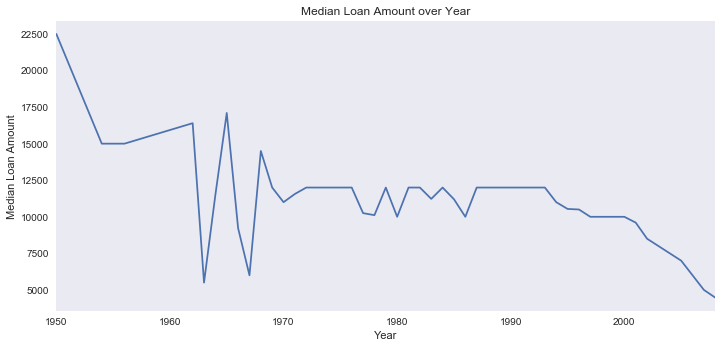

In [125]:
## Plot a line graph
plt.figure(figsize=[10,5])
gx = df.groupby(['earliest_cr_line_year'])['loan_amnt'].median().plot()
gx.grid(False)
plt.title("Median Loan Amount over Year")
plt.tight_layout()

plt.ylabel("Median Loan Amount")
plt.xlabel("Year")
plt.show()

###### Observation - Loan Amount Median is on decreasing trend so people are taking lower loan amounts

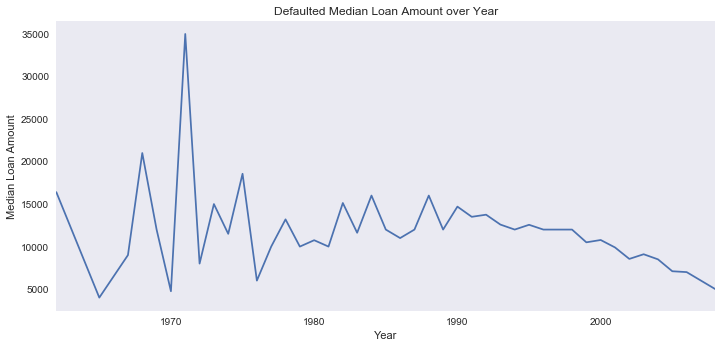

In [124]:
## Plot a line graph
plt.figure(figsize=[10,5])
lx = loan_default_frame.groupby(['earliest_cr_line_year'])['loan_amnt'].median().plot()
lx.grid(False)
plt.title("Defaulted Median Loan Amount over Year")
plt.tight_layout()

plt.ylabel("Median Loan Amount")
plt.xlabel("Year")
plt.show()

###### Observation - Defaulted Median loan amount is also on lower trend but those were opened in around 1970 to 1975 , there were unusal higher median defauled amount 

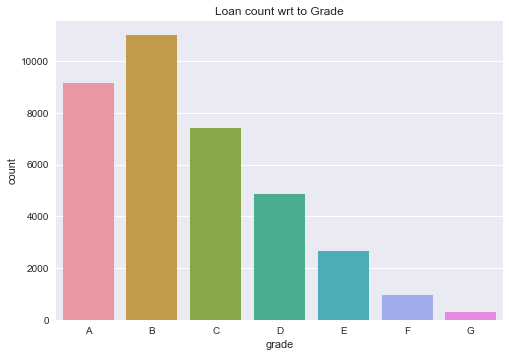

In [121]:
sns.countplot(x='grade', data=df)
plt.title("Loan count wrt to Grade")
plt.show()

###### Observation - There are maximum Number of Grade B Applicants

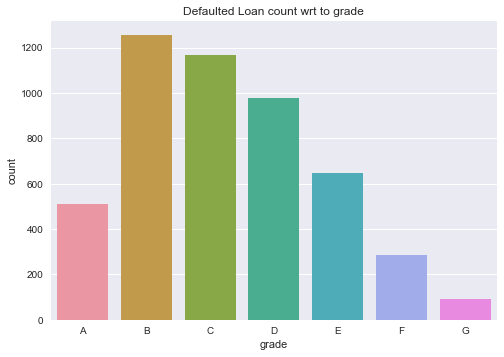

In [122]:
sns.countplot(x='grade', data=loan_default_frame)
plt.title("Defaulted Loan count wrt to grade")
plt.show()

###### Although There were maximum number of Grade applicants but we 
###### saw here ratio of Defaulters are maximum for C, D,E, F  and G  grade people are maximum
###### while for A its least

## Multivariate analysis

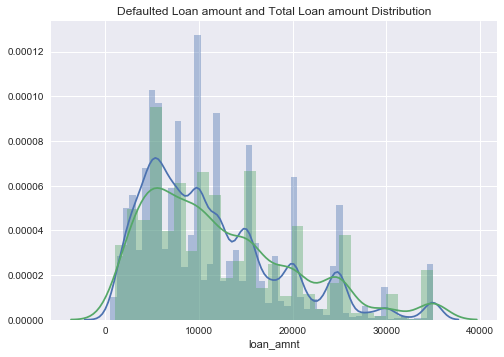

In [120]:
plt.title("Defaulted Loan amount and Total Loan amount Distribution")
sns.distplot(df['loan_amnt'])
sns.distplot(loan_default_frame['loan_amnt'])
plt.show()

###### Observation - Both Defaulted and total Amount follow right skewed distrubution with maximum loan amount lie towards lower side of distribution

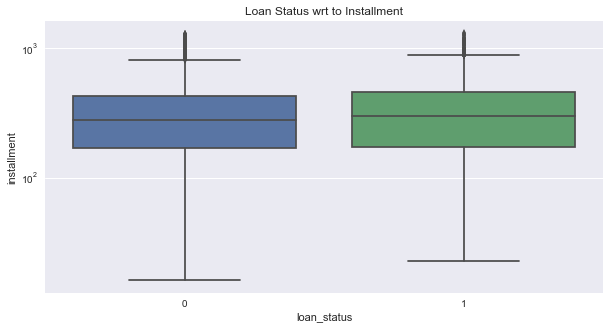

In [119]:

plt.figure(figsize=[10,5])
sns.boxplot(x='loan_status', y='installment', data=df)
plt.title("Loan Status wrt to Installment")
plt.yscale('log')
plt.show()

###### Observation - Non Foreclouse Installment(0) is less spreaded and having less median value as compared to defaulted instalments

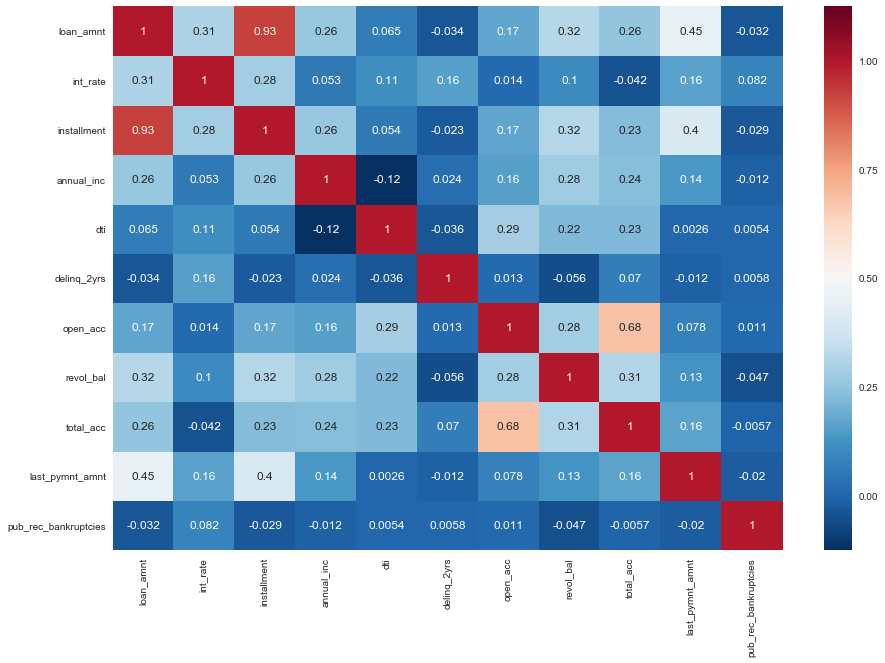

In [55]:

plt.figure(figsize=(15,10))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
        'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = df[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)
plt.show()


###### observation:
Installment and Loan Amount are highly positively Corelated. Bigger Loan amount and smaller Loan Installments
total_acc(The total number of credit lines currently in the borrower's credit file) and open_acc(The number of open credit lines in the borrower's credit file) are also highly positively corelated.
loan amount and last_paymnt_amnt are  positively Corelated. Smaller installment leading to higher Int Rate as expected
Installment and int Rate are  positively Corelated. Smaller installment leading to higher Int Rate as expected






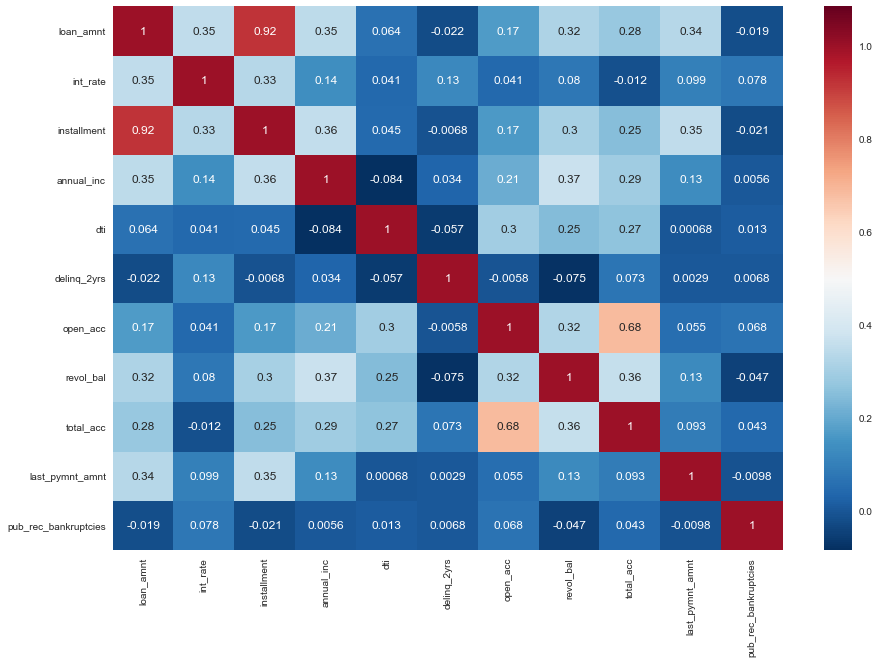

In [56]:

plt.figure(figsize=(15,10))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
        'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = loan_default_frame[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)
plt.show()

###### Observation -
we can see for defaulted loan there is more strong positive co relation for-
revol bal and loan amount, revolv balance and instalment, total_acc and loan_amnt, annual_inc and loan_amnt. int_rate and loan_amount. 
we can see these people are having slight high income so that get higher loan amount with more interest rate since they were having more revolving balance around

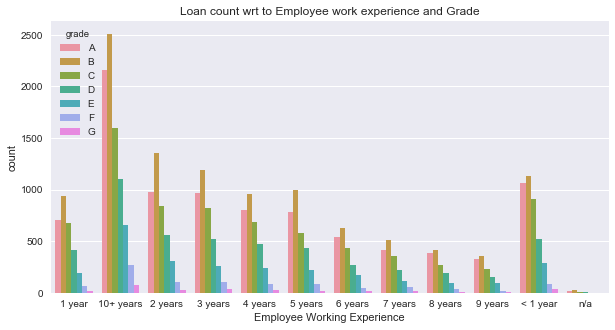

In [118]:
plt.figure(figsize=[10,5])
sns.countplot(x='emp_length', data=df, hue = 'grade')
plt.xlabel('Employee Working Experience')
plt.title("Loan count wrt to Employee work experience and Grade")
plt.show()

###### Observation - Maximum Employee with 10+ years and grade B of work take loans

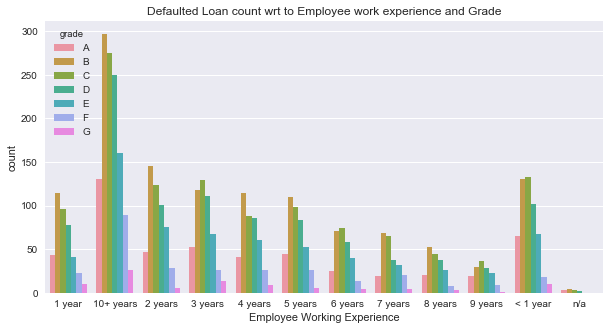

In [117]:
plt.figure(figsize=[10,5])
sns.countplot(x='emp_length', data=loan_default_frame, hue = 'grade')
plt.xlabel('Employee Working Experience')
plt.title("Defaulted Loan count wrt to Employee work experience and Grade") 
plt.show()

###### Maximum Employee 10+ year of work experience with grade B defaulted the most too , 
###### but here we noticed that ratio of defaulted loans is quite less for grade A , 10 + work ex
###### employee so that seems suitable category, Similar trend we can notice all over the work experience

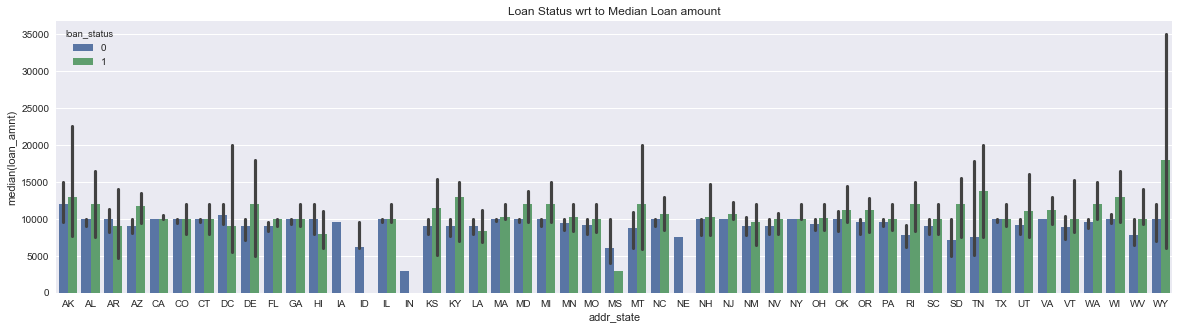

In [116]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=df, estimator=np.median)
plt.title("Loan Status wrt to Median Loan amount") 
plt.show()

###### Observation - Max median Loan Amount was taken by WY State. Also there are states like NE, IN, ID and IA where there are no Loan Defaulted 

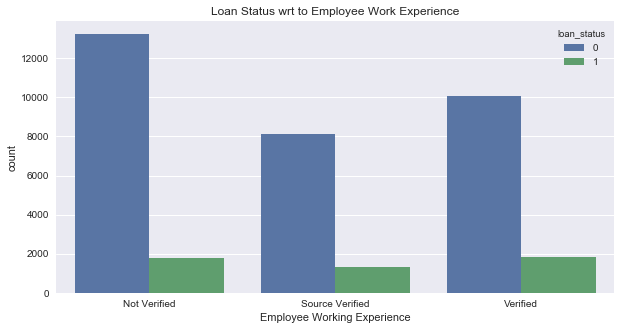

In [115]:
plt.figure(figsize=[10,5])
sns.countplot(x='verification_status', data=df, hue='loan_status')
plt.xlabel('Employee Working Experience')
plt.title("Loan Status wrt to Employee Work Experience") 
plt.show()

###### Observation - There are maximum Loans given where Employee work eperience is not verified wherease proportion of loan defaulted is maximum in verified so employee verification has no role

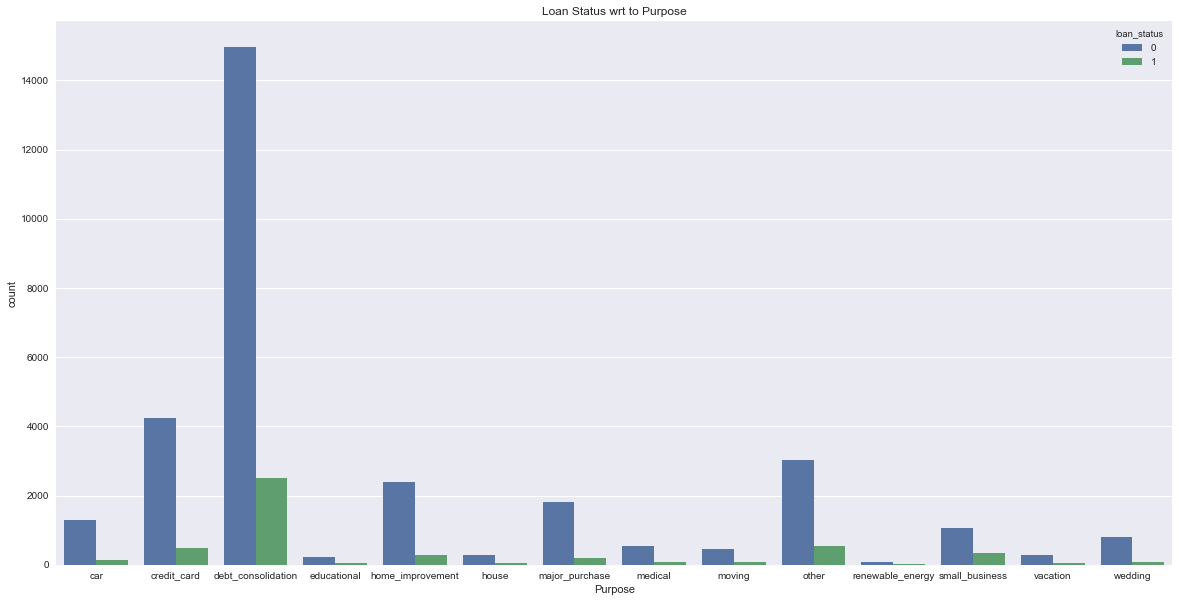

In [114]:
plt.figure(figsize=[20,10])
sns.countplot(x='purpose', data=df, hue='loan_status')
plt.xlabel('Purpose')
plt.title("Loan Status wrt to Purpose") 
plt.show()

###### Observation - Maximum Loan are taken for Debt-consolidation purpose so it has max number of defaulted loan too, although ratio of defaulted loan by total loan is max for small_business

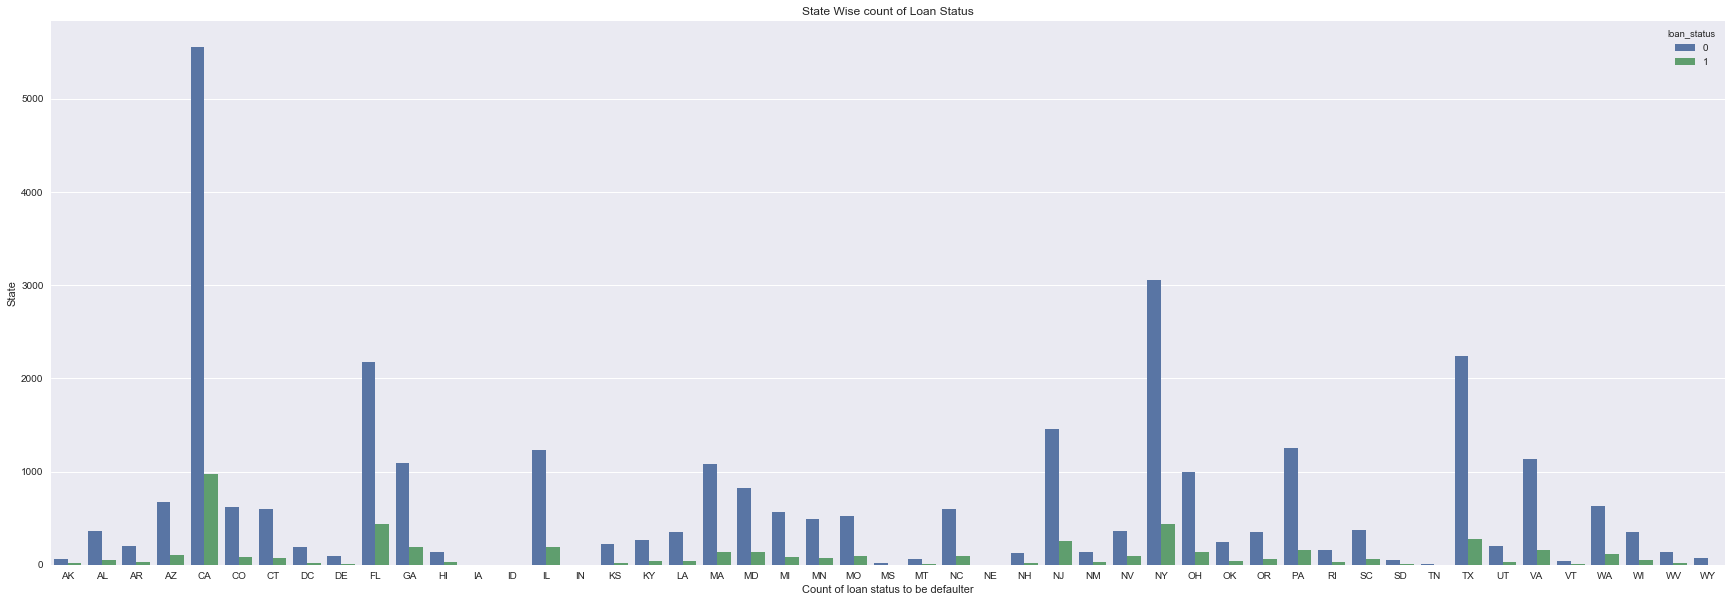

In [113]:
plt.figure(figsize=[30,10])
sns.countplot(x='addr_state', data=df, hue='loan_status')
plt.xlabel('Count of loan status to be defaulter')
plt.title("State Wise count of Loan Status") 
plt.ylabel('State')
plt.show()

###### Observation - Maximum count of loan amount are under CA state and so are the defaulted loans.CA,FL,NY,TX are generating maximum loan. While the ratio of deaulted loan seems best for CA since number of forclosed are less as compare to toal loan disbursed

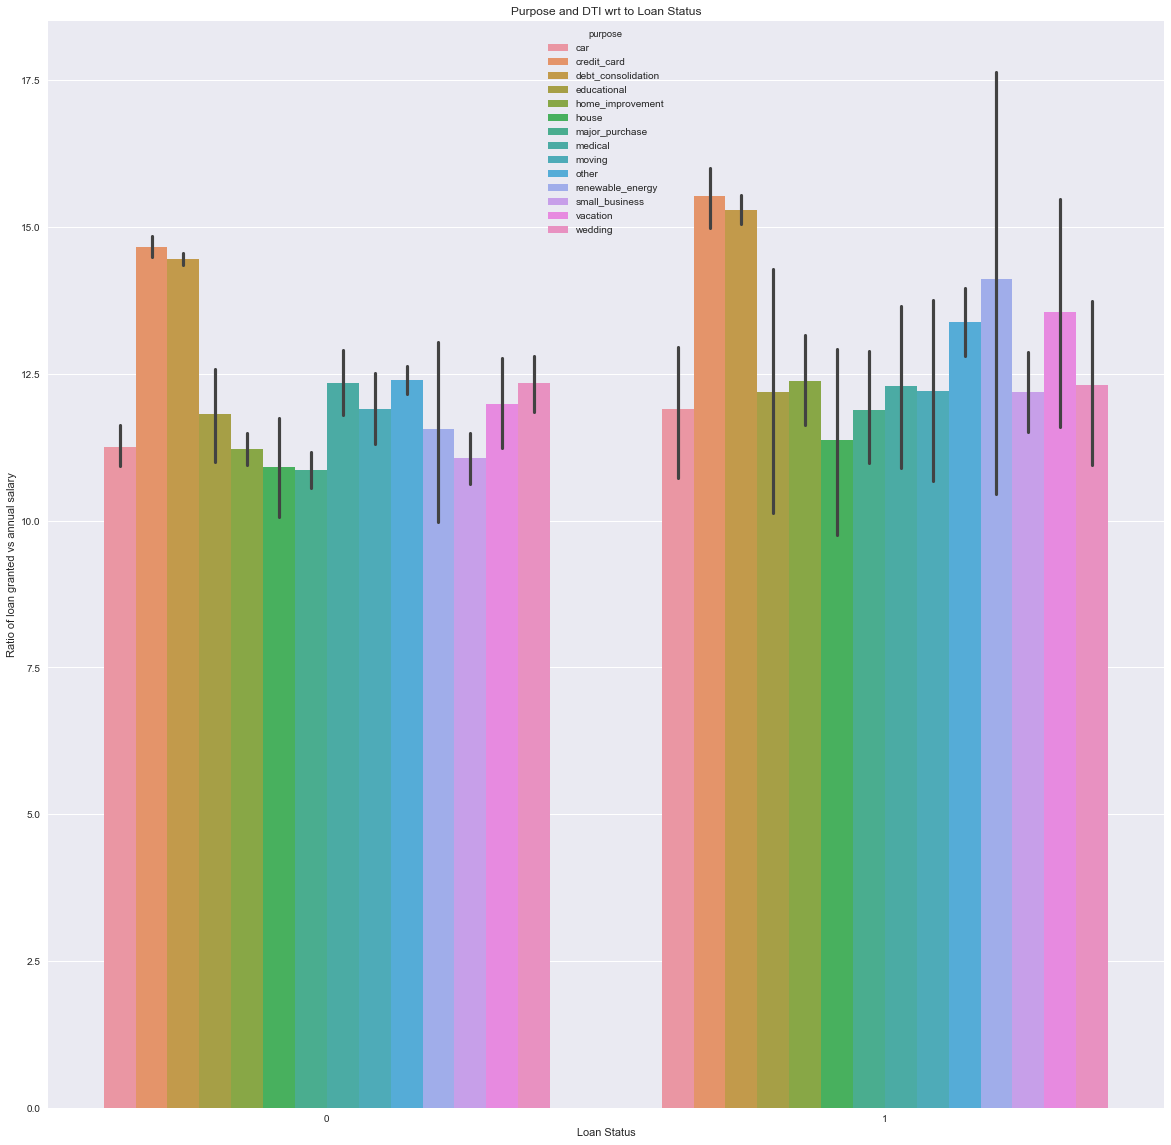

In [112]:
plt.figure(figsize=(20,20))

sns.barplot(x='loan_status',y='dti',hue='purpose',data=df)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.title("Purpose and DTI wrt to Loan Status") 
plt.show()

###### Observation - For vaction,renewable energy and home improvement purpose dti is more

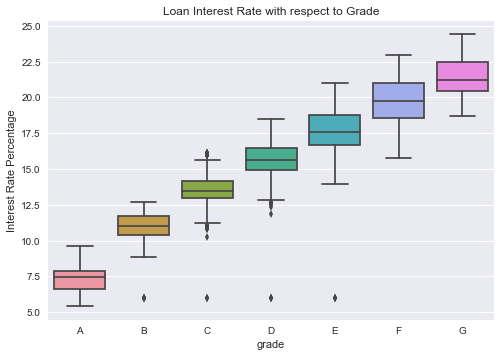

In [111]:

sns.boxplot(y='int_rate', x='grade', data=df)
plt.ylabel('Interest Rate Percentage')
plt.title("Loan Interest Rate with respect to Grade") 
plt.show()

###### Observation- Interest Rate increase along with the Grade

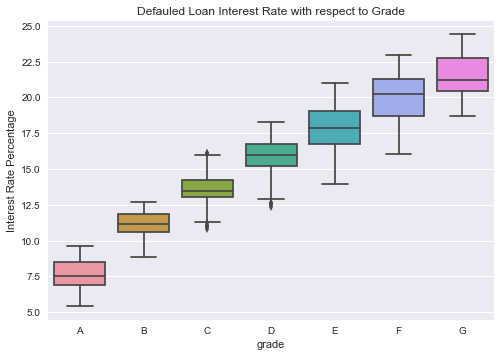

In [110]:
sns.boxplot(y='int_rate', x='grade', data=loan_default_frame)
plt.ylabel('Interest Rate Percentage')
plt.title("Defauled Loan Interest Rate with respect to Grade") 
plt.show()

###### Obseration - For deafulted loans too, similar trend is there

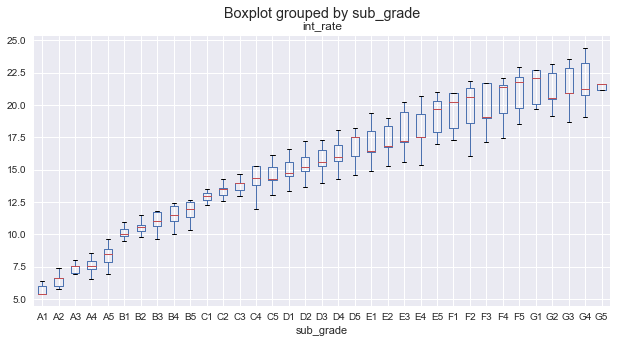

In [76]:
loan_default_frame.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))
plt.show()

###### Rate of interest increases with the increase in sub grade

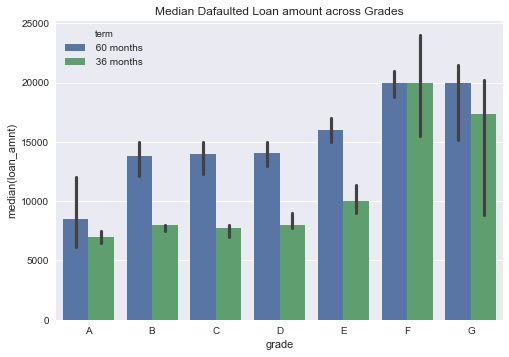

In [103]:

sns.barplot(x='grade', y='loan_amnt', hue="term", data=loan_default_frame, estimator=np.median)
plt.title("Median Dafaulted Loan amount across Grades")
plt.show()

###### Observation - 60 Montths loan are more predominant in all grades

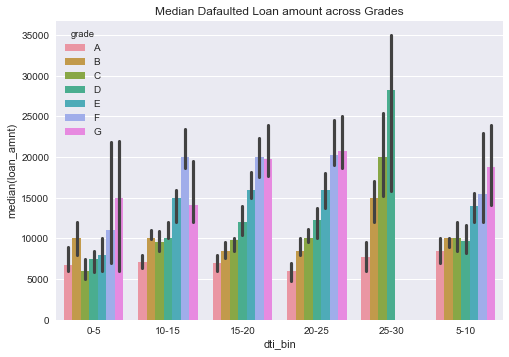

In [130]:
sns.barplot(x='dti_bin', y='loan_amnt', hue="grade", data=loan_default_frame, estimator=np.median)
plt.title("Median Dafaulted Loan amount across Grades")
plt.show()




###### Observation - Grade A people have consistenly Low DTI  compare to other Grade groups


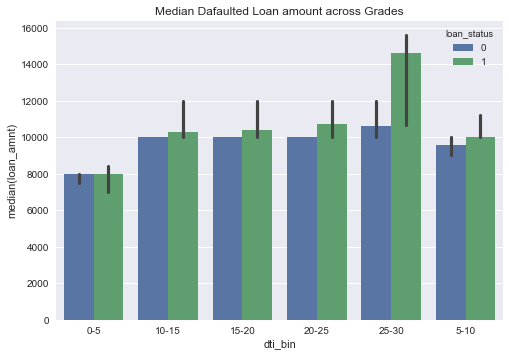

In [131]:
sns.barplot(x='dti_bin', y='loan_amnt', hue="loan_status", data=df, estimator=np.median)
plt.title("Median Dafaulted Loan amount across Grades")
plt.show()

###### Observation - DTI with 25 to 30 range has max loan default

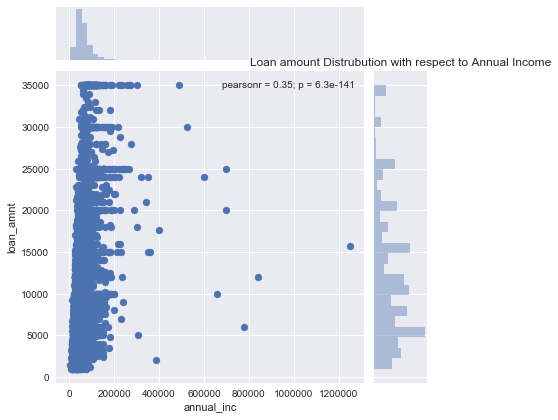

In [109]:
 sns.jointplot('annual_inc', 'loan_amnt', loan_default_frame)
plt.title("Loan amount Distrubution with respect to Annual Income")    
plt.show()

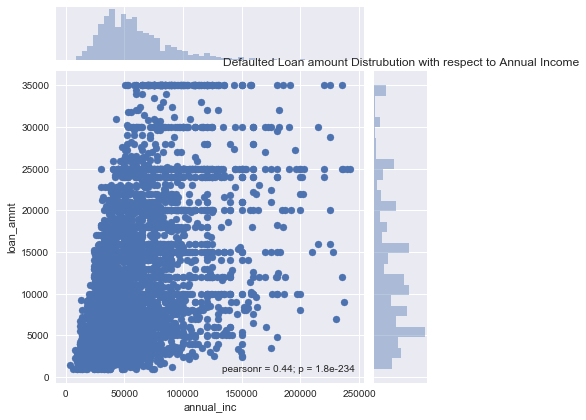

In [108]:
#lets try to remove those outliers value to further get to know trend

sns.jointplot('annual_inc', 'loan_amnt', loan_default_frame.loc[loan_default_frame['annual_inc']<250000])
plt.title("Defaulted Loan amount Distrubution with respect to Annual Income")
plt.show()

###### Observation - Maximum chunk is conentrated along salary range upto 10000(1 Lac ) and loan amount upto 20k

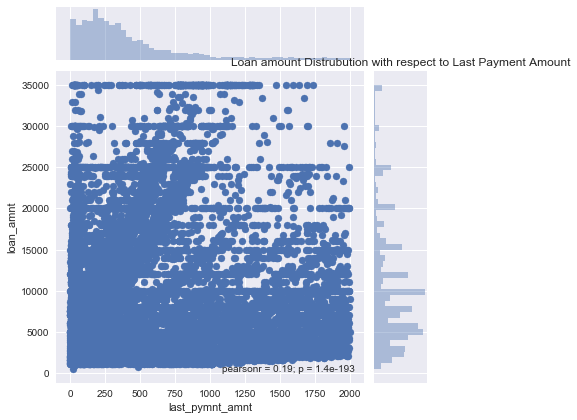

In [107]:
##added 20 k since it was assistning to find more patterns
sns.jointplot('last_pymnt_amnt', 'loan_amnt', df.loc[df.last_pymnt_amnt < 2000])
plt.title("Loan amount Distrubution with respect to Last Payment Amount")
plt.show()

###### Here there are no specific Trend and values are concentrated all around

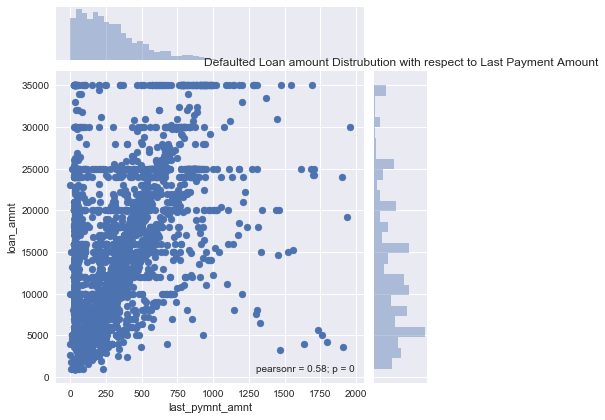

In [106]:
##added 20 k since it was assistning to find more patterns
sns.jointplot('last_pymnt_amnt', 'loan_amnt', loan_default_frame.loc[loan_default_frame.last_pymnt_amnt < 2000])
plt.title("Defaulted Loan amount Distrubution with respect to Last Payment Amount")
plt.show()

###### Observation - Maximum observation lies where installment are under 500 
###### and loan amount  are under 15k and here we can see specific trend too

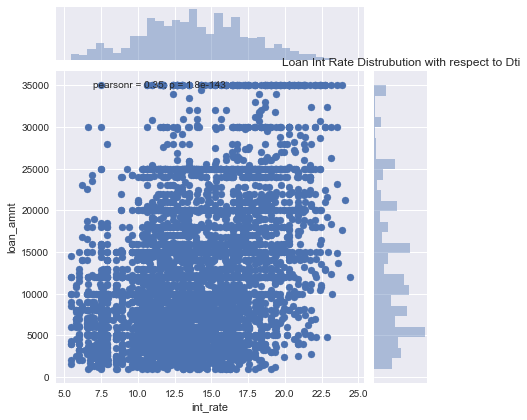

In [105]:

sns.jointplot('int_rate', 'loan_amnt', loan_default_frame)
plt.title("Loan Int Rate Distrubution with respect to Dti")
plt.show()

###### Observation - Interest rate lies between 10 to 20 and loan amount under 15k

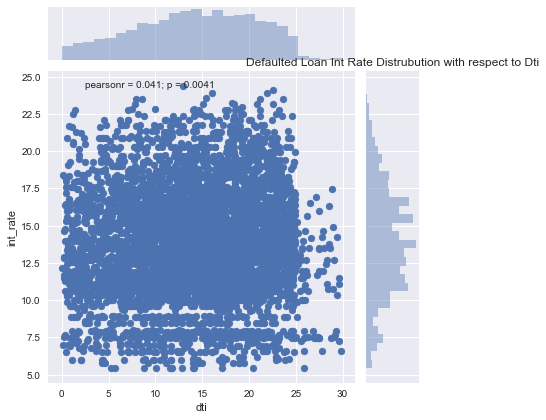

In [104]:

sns.jointplot('dti', 'int_rate', loan_default_frame)
plt.title("Defaulted Loan Int Rate Distrubution with respect to Dti")
plt.show()

###### Observation - Maximum Observation are concentrated along 5 to 25 dti and 10 to 17 interest Rate